In [1]:
import unittest
import re
from math import sqrt

--- Day 10: The Stars Align ---

It's no use; your navigation system simply isn't capable of providing walking directions in the arctic circle, and certainly not in 1018.

The Elves suggest an alternative. In times like these, North Pole rescue operations will arrange points of light in the sky to guide missing Elves back to base. Unfortunately, the message is easy to miss: the points move slowly enough that it takes hours to align them, but have so much momentum that they only stay aligned for a second. If you blink at the wrong time, it might be hours before another message appears.

You can see these points of light floating in the distance, and record their position in the sky and their velocity, the relative change in position per second (your puzzle input). The coordinates are all given from your perspective; given enough time, those positions and velocities will move the points into a cohesive message!

Rather than wait, you decide to fast-forward the process and calculate what the points will eventually spell.

For example, suppose you note the following points:
```
position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>
```
Each line represents one point. Positions are given as <X, Y> pairs: X represents how far left (negative) or right (positive) the point appears, while Y represents how far up (negative) or down (positive) the point appears.

At 0 seconds, each point has the position given. Each second, each point's velocity is added to its position. So, a point with velocity <1, -2> is moving to the right, but is moving upward twice as quickly. If this point's initial position were <3, 9>, after 3 seconds, its position would become <6, 3>.

Over time, the points listed above would move like this:

Initially:
```
........#.............
................#.....
.........#.#..#.......
......................
#..........#.#.......#
...............#......
....#.................
..#.#....#............
.......#..............
......#...............
...#...#.#...#........
....#..#..#.........#.
.......#..............
...........#..#.......
#...........#.........
...#.......#..........
```
After 1 second:
```
......................
......................
..........#....#......
........#.....#.......
..#.........#......#..
......................
......#...............
....##.........#......
......#.#.............
.....##.##..#.........
........#.#...........
........#...#.....#...
..#...........#.......
....#.....#.#.........
......................
......................
```
After 2 seconds:
```
......................
......................
......................
..............#.......
....#..#...####..#....
......................
........#....#........
......#.#.............
.......#...#..........
.......#..#..#.#......
....#....#.#..........
.....#...#...##.#.....
........#.............
......................
......................
......................
```
After 3 seconds:
```
......................
......................
......................
......................
......#...#..###......
......#...#...#.......
......#...#...#.......
......#####...#.......
......#...#...#.......
......#...#...#.......
......#...#...#.......
......#...#..###......
......................
......................
......................
......................
```
After 4 seconds:
```
......................
......................
......................
............#.........
........##...#.#......
......#.....#..#......
.....#..##.##.#.......
.......##.#....#......
...........#....#.....
..............#.......
....#......#...#......
.....#.....##.........
...............#......
...............#......
......................
......................
```
After 3 seconds, the message appeared briefly: HI. Of course, your message will be much longer and will take many more seconds to appear.

What message will eventually appear in the sky?


In [2]:
test_points_raw = '''position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>
'''

test_points = list(map(lambda x: list(map(int, re.findall(r'-?\d+', x))), test_points_raw.splitlines()))
points = list(map(lambda x: list(map(int, re.findall(r'-?\d+', x))), open('input.txt').read().splitlines()))

In [3]:
test_points

[[9, 1, 0, 2],
 [7, 0, -1, 0],
 [3, -2, -1, 1],
 [6, 10, -2, -1],
 [2, -4, 2, 2],
 [-6, 10, 2, -2],
 [1, 8, 1, -1],
 [1, 7, 1, 0],
 [-3, 11, 1, -2],
 [7, 6, -1, -1],
 [-2, 3, 1, 0],
 [-4, 3, 2, 0],
 [10, -3, -1, 1],
 [5, 11, 1, -2],
 [4, 7, 0, -1],
 [8, -2, 0, 1],
 [15, 0, -2, 0],
 [1, 6, 1, 0],
 [8, 9, 0, -1],
 [3, 3, -1, 1],
 [0, 5, 0, -1],
 [-2, 2, 2, 0],
 [5, -2, 1, 2],
 [1, 4, 2, 1],
 [-2, 7, 2, -2],
 [3, 6, -1, -1],
 [5, 0, 1, 0],
 [-6, 0, 2, 0],
 [5, 9, 1, -2],
 [14, 7, -2, 0],
 [-3, 6, 2, -1]]

In [4]:
class TestIt(unittest.TestCase):
    
    def setUp(self):
        self.lightArray = LightArray(test_points)
        
    def test_1(self):
        self.assertEqual(self.lightArray.msgTime(), 3)

In [5]:
class LightArray(object):
    
    def __init__(self, points):
        self.x0, self.y0, self.vx, self.vy = zip(*points)
        self.x = self.x0[:]
        self.y = self.y0[:]
        self.t = 0
        
    def bbX(self):
        return max(self.x) - min(self.x)
    
    def bbY(self):
        return max(self.y) - min(self.y)
    
    def bbDiag(self):
        return sqrt(self.bbX()**2 + self.bbY()**2)
    
    def evolve(self, t):
        self.x = [x0 + t * vx for x0, vx in zip(self.x0, self.vx)]
        self.y = [y0 + t * vy for y0, vy in zip(self.y0, self.vy)]
        self.t = t
        return self
        
    def msgTime(self):
        bblast = self.evolve(0).bbDiag()
        t = 1
        while True:
            bb = self.evolve(t).bbDiag()
            if bb > bblast:
                self.evolve(t - 1)
                return self.t
            bblast = bb
            t += 1
        return 0
    
    def msg(self):
        _ = self.msgTime()
        return self
    
    def __str__(self):
        xmin = min(self.x)
        ymin = min(self.y)
        w = self.bbX() + 1
        h = self.bbY() + 1
        
        row = ['.'] * w
        array = list()
        for i in range(h):
            array.append(row[:])
        
        for x, y in zip(self.x, self.y):
            array[y - ymin][x - xmin] = '#'
        
        return '\n'.join(''.join(r) for r in array)
    
    __repr__ = __str__

In [6]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestIt)
unittest.TextTestRunner(verbosity=2).run(suite)

test_1 (__main__.TestIt) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.015s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

In [7]:
la = LightArray(test_points)

In [8]:
la.msg()

#...#..###
#...#...#.
#...#...#.
#####...#.
#...#...#.
#...#...#.
#...#...#.
#...#..###

In [9]:
part1 = LightArray(points)

# Part 1

In [10]:
part1.msg()

######....##....######..######..#####...#.......######...####.
.....#...#..#...#............#..#....#..#............#..#....#
.....#..#....#..#............#..#....#..#............#..#.....
....#...#....#..#...........#...#....#..#...........#...#.....
...#....#....#..#####......#....#####...#..........#....#.....
..#.....######..#.........#.....#..#....#.........#.....#..###
.#......#....#..#........#......#...#...#........#......#....#
#.......#....#..#.......#.......#...#...#.......#.......#....#
#.......#....#..#.......#.......#....#..#.......#.......#...##
######..#....#..######..######..#....#..######..######...###.#

# Part 2

In [11]:
part1.t

10105

# Visualisation

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

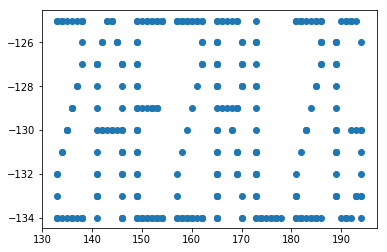

In [13]:
plt.scatter(part1.x, [-y for y in part1.y])

In [14]:
import numpy as np

In [15]:
p1 = part1.evolve(0)

In [16]:
p1.bbX()

101109

In [17]:
p1.bbY()

101059

In [18]:
size = 800

t = 0
part1.evolve(t)
while part1.bbX() > size or part1.bbY() > size:
    t += 1
    part1.evolve(t)
tmin = t
xmin = min(part1.x)
ymin = min(part1.y)
while max(part1.x) - xmin <= size and max(part1.y) - ymin <= size:
    t += 1
    part1.evolve(t)
tmax = t

In [19]:
tmin, tmax, xmin, ymin

(10031, 10180, -235, -245)

In [24]:
for t in range(tmin, tmax + 1):
    part1.evolve(t)
    im = np.zeros((size + 10, size + 10))
    for x, y in zip(part1.x, part1.y):
        im[800 - y + ymin][x - xmin] = 1.
    image = plt.imsave(f'frames/frame{t - tmin:03d}.png', im)
